In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
%matplotlib inline


In [17]:
# Carregar os dados de exemplo
data = pd.read_excel('statusinvest-filtrada.xlsx')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TICKER                 601 non-null    object 
 1   PRECO                  601 non-null    float64
 2    VALOR DE MERCADO      594 non-null    float64
 3    LPA                   601 non-null    float64
 4    VPA                   601 non-null    float64
 5   P/L                    601 non-null    float64
 6   EV/EBIT                594 non-null    float64
 7   DY                     335 non-null    float64
 8   MARGEM BRUTA           573 non-null    float64
 9   MARGEM EBIT            573 non-null    float64
 10  MARG. LIQUIDA          573 non-null    float64
 11  ROE                    597 non-null    float64
 12  ROA                    600 non-null    float64
 13  DIVIDA LIQUIDA / EBIT  544 non-null    float64
 14  LIQ. CORRENTE          566 non-null    float64
dtypes: flo

In [18]:
data.columns

Index(['TICKER', 'PRECO', ' VALOR DE MERCADO', ' LPA', ' VPA', 'P/L',
       'EV/EBIT', 'DY', 'MARGEM BRUTA', 'MARGEM EBIT', 'MARG. LIQUIDA', 'ROE',
       'ROA', 'DIVIDA LIQUIDA / EBIT', 'LIQ. CORRENTE'],
      dtype='object')

In [19]:
data.isnull().sum()/len(data) * 100

TICKER                    0.000000
PRECO                     0.000000
 VALOR DE MERCADO         1.164725
 LPA                      0.000000
 VPA                      0.000000
P/L                       0.000000
EV/EBIT                   1.164725
DY                       44.259567
MARGEM BRUTA              4.658902
MARGEM EBIT               4.658902
MARG. LIQUIDA             4.658902
ROE                       0.665557
ROA                       0.166389
DIVIDA LIQUIDA / EBIT     9.484193
LIQ. CORRENTE             5.823627
dtype: float64

In [20]:
data.head()

,TICKER,PRECO,VALOR DE MERCADO,LPA,VPA,P/L,EV/EBIT,DY,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,ROE,ROA,DIVIDA LIQUIDA / EBIT,LIQ. CORRENTE
0,AALR3,22.80,2.697076e+09,-2.09,7.67,-10.90,-209.03,NaN,30.83,-1.55,-22.50,-27.28,-9.62,-50.55,0.63
1,ABCB4,16.38,3.703356e+09,3.61,23.46,4.53,3.28,6.62,32.56,26.15,18.94,15.40,1.53,NaN,1.39
2,ABEV3,14.45,2.276429e+11,0.94,5.40,15.44,11.91,5.28,49.71,22.46,18.03,17.35,10.88,-0.48,0.99
3,ADHM3,1.56,2.543977e+07,-0.38,-1.21,-4.09,-5.69,NaN,100.00,-13548.48,-18860.61,-31.47,-2571.90,0.00,0.00
4,AERI3,1.56,1.195293e+09,-0.15,1.13,-10.29,8.56,NaN,13.11,9.22,-4.20,-13.47,-3.53,3.87,1.93


In [21]:
for column in data.columns:
    # Calcular a moda da coluna
    mode_value = data[column].mode()[0]
    print(column, mode_value)
    
    # Substituir os valores NaN pela moda da coluna
    data[column].fillna(mode_value, inplace=True)

TICKER AALR3
PRECO 0.0
 VALOR DE MERCADO 0.0
 LPA 0.7
 VPA 0.0
P/L 0.0
EV/EBIT -15.46
DY 1.62
MARGEM BRUTA 100.0
MARGEM EBIT 1397.5
MARG. LIQUIDA 2207.62
ROE 4.61
ROA 2.48
DIVIDA LIQUIDA / EBIT -28.66
LIQ. CORRENTE 1.94


In [22]:
data.isnull().sum()/len(data) * 100

TICKER                   0.0
PRECO                    0.0
 VALOR DE MERCADO        0.0
 LPA                     0.0
 VPA                     0.0
P/L                      0.0
EV/EBIT                  0.0
DY                       0.0
MARGEM BRUTA             0.0
MARGEM EBIT              0.0
MARG. LIQUIDA            0.0
ROE                      0.0
ROA                      0.0
DIVIDA LIQUIDA / EBIT    0.0
LIQ. CORRENTE            0.0
dtype: float64

In [23]:
data.shape

(601, 15)

In [24]:
data.head()

,TICKER,PRECO,VALOR DE MERCADO,LPA,VPA,P/L,EV/EBIT,DY,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,ROE,ROA,DIVIDA LIQUIDA / EBIT,LIQ. CORRENTE
0,AALR3,22.80,2.697076e+09,-2.09,7.67,-10.90,-209.03,1.62,30.83,-1.55,-22.50,-27.28,-9.62,-50.55,0.63
1,ABCB4,16.38,3.703356e+09,3.61,23.46,4.53,3.28,6.62,32.56,26.15,18.94,15.40,1.53,-28.66,1.39
2,ABEV3,14.45,2.276429e+11,0.94,5.40,15.44,11.91,5.28,49.71,22.46,18.03,17.35,10.88,-0.48,0.99
3,ADHM3,1.56,2.543977e+07,-0.38,-1.21,-4.09,-5.69,1.62,100.00,-13548.48,-18860.61,-31.47,-2571.90,0.00,0.00
4,AERI3,1.56,1.195293e+09,-0.15,1.13,-10.29,8.56,1.62,13.11,9.22,-4.20,-13.47,-3.53,3.87,1.93


In [25]:
data.dtypes

TICKER                    object
PRECO                    float64
 VALOR DE MERCADO        float64
 LPA                     float64
 VPA                     float64
P/L                      float64
EV/EBIT                  float64
DY                       float64
MARGEM BRUTA             float64
MARGEM EBIT              float64
MARG. LIQUIDA            float64
ROE                      float64
ROA                      float64
DIVIDA LIQUIDA / EBIT    float64
LIQ. CORRENTE            float64
dtype: object

In [26]:
correlation = data.corr()
correlation

C:\Users\MessiasOliveira\AppData\Local\Temp\ipykernel_12696\3106392754.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,PRECO,VALOR DE MERCADO,LPA,VPA,P/L,EV/EBIT,DY,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,ROE,ROA,DIVIDA LIQUIDA / EBIT,LIQ. CORRENTE
PRECO,1.000000,0.044271,-0.017796,0.001890,0.287328,0.095255,-0.004711,0.009048,-0.001338,-0.002926,0.018687,0.007382,0.012607,-0.004562
VALOR DE MERCADO,0.044271,1.000000,-0.017217,-0.018594,0.024764,0.038948,0.004939,0.032355,-0.003319,-0.020206,0.028730,0.009834,-0.049164,-0.004533
LPA,-0.017796,-0.017217,1.000000,0.994867,-0.003825,-0.005118,0.007061,0.004757,0.010294,0.009028,0.004842,0.012861,-0.053673,-0.007015
VPA,0.001890,-0.018594,0.994867,1.000000,-0.003985,-0.005554,-0.003225,0.005304,0.004257,-0.001749,0.001504,0.000447,-0.058332,-0.003270
P/L,0.287328,0.024764,-0.003825,-0.003985,1.000000,0.009073,-0.004245,0.005195,0.008636,0.005580,0.041824,0.031686,-0.001239,0.022014
EV/EBIT,0.095255,0.038948,-0.005118,-0.005554,0.009073,1.000000,-0.004265,0.016540,0.057281,0.077972,0.010840,-0.161883,0.055852,-0.026912
DY,-0.004711,0.004939,0.007061,-0.003225,-0.004245,-0.004265,1.000000,0.014701,0.129129,0.093210,0.024851,0.011372,-0.000150,0.013395
MARGEM BRUTA,0.009048,0.032355,0.004757,0.005304,0.005195,0.016540,0.014701,1.000000,-0.111355,-0.154653,-0.002760,0.001096,0.102970,0.009199
MARGEM EBIT,-0.001338,-0.003319,0.010294,0.004257,0.008636,0.057281,0.129129,-0.111355,1.000000,0.725429,0.001310,0.342903,-0.065250,0.034218
MARG. LIQUIDA,-0.002926,-0.020206,0.009028,-0.001749,0.005580,0.077972,0.093210,-0.154653,0.725429,1.000000,-0.041158,0.732346,-0.005084,0.056932


<Axes: >

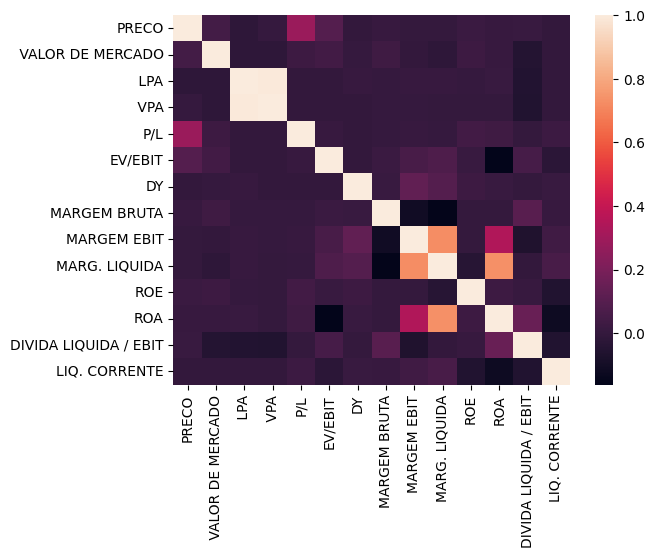

In [27]:
sns.heatmap(correlation, annot=False)

In [28]:
tikers = data["TICKER"].array
data = data.drop("TICKER", axis=1)
dataset_atrib = data.values
dataset_atrib

array([[ 2.28000000e+01,  2.69707620e+09, -2.09000000e+00, ...,
        -9.62000000e+00, -5.05500000e+01,  6.30000000e-01],
       [ 1.63800000e+01,  3.70335613e+09,  3.61000000e+00, ...,
         1.53000000e+00, -2.86600000e+01,  1.39000000e+00],
       [ 1.44500000e+01,  2.27642891e+11,  9.40000000e-01, ...,
         1.08800000e+01, -4.80000000e-01,  9.90000000e-01],
       ...,
       [ 2.22000000e+01,  7.65320502e+08,  3.22000000e+00, ...,
         1.44500000e+01,  1.70000000e-01,  3.41000000e+00],
       [ 1.24400000e+01,  3.84506531e+09,  5.00000000e-02, ...,
         1.50000000e-01,  5.93000000e+00,  1.74000000e+00],
       [ 4.16000000e+00,  1.14547866e+09, -2.90000000e-01, ...,
        -1.97000000e+00,  6.78000000e+00,  1.11000000e+00]])

In [29]:
# Reduzir a dimensionalidade dos dados para visualização
pca = PCA(n_components=2).fit_transform(dataset_atrib)
pca = (pca - np.mean(pca)) / np.std(pca)
pca

array([[-3.42157810e-01, -4.25686096e-08],
       [-3.01917857e-01, -4.15684083e-08],
       [ 8.65316126e+00,  3.64850873e-08],
       ...,
       [-4.19406453e-01, -4.28575020e-08],
       [-2.96251074e-01, -4.20663004e-08],
       [-4.04204375e-01, -4.32091308e-08]])

In [30]:
k_range = range(1, 10)
k_range

range(1, 10)

In [31]:
# Aplicar o algoritmo K-means para criar os clusters
kmeans_var = [KMeans(n_clusters=k).fit(pca) for k in k_range]

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

Curva de Elbow
Quanto menos variancia conseguimos explicar menos conhecemos os dados, quanto mais variancia conseguimos explicar mais conhecemos os dados.

Text(0.5, 1.0, 'Variância Explicada para cada Valor K')

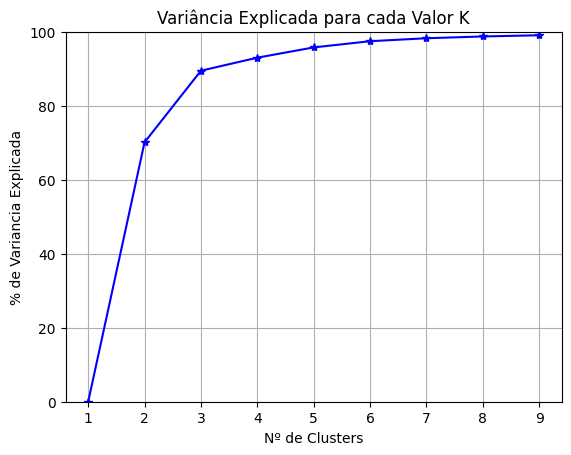

In [51]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in kmeans_var]

# Calculando a distancia euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

# Soma dos quadrados das distancias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

# Soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]

# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel("Nº de Clusters")
plt.ylabel('% de Variancia Explicada')
plt.title('Variância Explicada para cada Valor K')

Escolhendo um valor de K Inicial (igual a 3) para avaliação da Máquina Preditiva

Avaliação da Máquina Preditiva

Avaliando Máquina V1 com k = 3

In [33]:
modelo_V1 = KMeans(n_clusters= 3)
modelo_V1.fit(pca)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [34]:
# Obtém os valores mínimos e máximos e organiza o shape
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1 
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = modelo_V1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

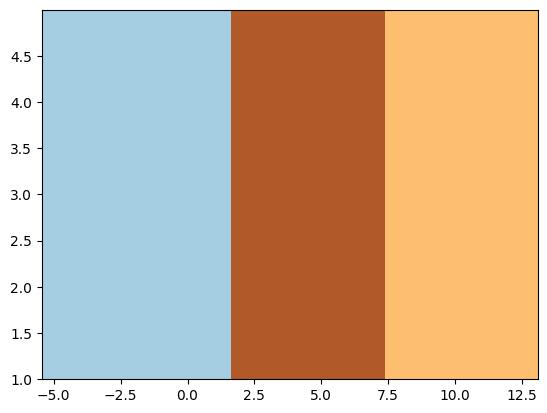

In [35]:
# Plot das áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
            interpolation='nearest',
            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap= plt.cm.Paired,
            aspect='auto',
            origin='lower')

In [36]:
labels = modelo_V1.labels_
silhouette_score(pca, labels, metric='euclidean')

0.9034376397067451

Máquina preditiva v2 com k = 4

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


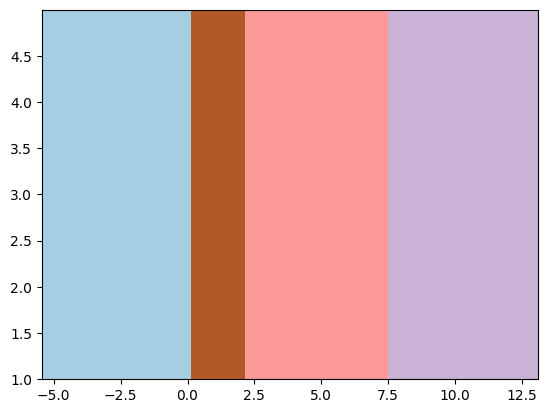

In [37]:
modelo_V2 = KMeans(n_clusters= 4)
modelo_V2.fit(pca)
Z = modelo_V2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot das áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
            interpolation='nearest',
            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap= plt.cm.Paired,
            aspect='auto',
            origin='lower')

In [38]:
labels = modelo_V2.labels_
silhouette_score(pca, labels, metric='euclidean')

0.776482819496062

Máquina preditiva v3 com k = 5

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


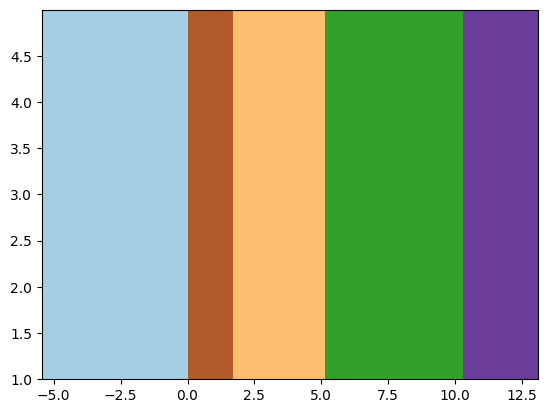

In [39]:
modelo_V3 = KMeans(n_clusters= 5)
modelo_V3.fit(pca)
Z = modelo_V3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot das áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
            interpolation='nearest',
            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap= plt.cm.Paired,
            aspect='auto',
            origin='lower')

In [40]:
labels = modelo_V3.labels_
silhouette_score(pca, labels, metric='euclidean')

0.7701350426006653

Máquina preditiva v4 com k = 6

In [41]:
modelo_V4 = KMeans(n_clusters= 6)
modelo_V4.fit(pca)
labels = modelo_V4.labels_
silhouette_score(pca, labels, metric='euclidean')

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7722617282525129

Marcar os conjuntos de dados com os clusters

In [54]:
# Lista as colunas
colunas = data.columns.array

# Incluindo o nº do cluster na base de dados
cluster_map = pd.DataFrame(dataset_atrib, columns=colunas)
cluster_map["Situação"] = modelo_V1.labels_
cluster_map["TICKER"] = tikers


In [43]:
cluster_map

,PRECO,VALOR DE MERCADO,LPA,VPA,P/L,EV/EBIT,DY,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,ROE,ROA,DIVIDA LIQUIDA / EBIT,LIQ. CORRENTE,Situação,TICKER
0,22.80,2.697076e+09,-2.09,7.67,-10.90,-209.03,1.62,30.83,-1.55,-22.50,-27.28,-9.62,-50.55,0.63,0,AALR3
1,16.38,3.703356e+09,3.61,23.46,4.53,3.28,6.62,32.56,26.15,18.94,15.40,1.53,-28.66,1.39,0,ABCB4
2,14.45,2.276429e+11,0.94,5.40,15.44,11.91,5.28,49.71,22.46,18.03,17.35,10.88,-0.48,0.99,1,ABEV3
3,1.56,2.543977e+07,-0.38,-1.21,-4.09,-5.69,1.62,100.00,-13548.48,-18860.61,-31.47,-2571.90,0.00,0.00,0,ADHM3
4,1.56,1.195293e+09,-0.15,1.13,-10.29,8.56,1.62,13.11,9.22,-4.20,-13.47,-3.53,3.87,1.93,0,AERI3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,5.71,9.130706e+08,0.71,2.45,8.08,2.83,7.80,57.99,36.42,11.37,28.86,4.92,0.31,1.09,0,WIZC3
597,19.60,7.653205e+08,3.22,17.09,6.08,5.17,5.83,13.34,7.75,5.94,18.85,14.45,0.17,3.41,0,WLMM3
598,22.20,7.653205e+08,3.22,17.09,6.89,5.17,5.66,13.34,7.75,5.94,18.85,14.45,0.17,3.41,0,WLMM4
599,12.44,3.845065e+09,0.05,10.03,264.48,11.36,1.62,57.39,15.09,0.31,0.47,0.15,5.93,1.74,0,YDUQ3


In [44]:
cluster_map

,PRECO,VALOR DE MERCADO,LPA,VPA,P/L,EV/EBIT,DY,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,ROE,ROA,DIVIDA LIQUIDA / EBIT,LIQ. CORRENTE,Situação,TICKER
0,22.80,2.697076e+09,-2.09,7.67,-10.90,-209.03,1.62,30.83,-1.55,-22.50,-27.28,-9.62,-50.55,0.63,0,AALR3
1,16.38,3.703356e+09,3.61,23.46,4.53,3.28,6.62,32.56,26.15,18.94,15.40,1.53,-28.66,1.39,0,ABCB4
2,14.45,2.276429e+11,0.94,5.40,15.44,11.91,5.28,49.71,22.46,18.03,17.35,10.88,-0.48,0.99,1,ABEV3
3,1.56,2.543977e+07,-0.38,-1.21,-4.09,-5.69,1.62,100.00,-13548.48,-18860.61,-31.47,-2571.90,0.00,0.00,0,ADHM3
4,1.56,1.195293e+09,-0.15,1.13,-10.29,8.56,1.62,13.11,9.22,-4.20,-13.47,-3.53,3.87,1.93,0,AERI3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,5.71,9.130706e+08,0.71,2.45,8.08,2.83,7.80,57.99,36.42,11.37,28.86,4.92,0.31,1.09,0,WIZC3
597,19.60,7.653205e+08,3.22,17.09,6.08,5.17,5.83,13.34,7.75,5.94,18.85,14.45,0.17,3.41,0,WLMM3
598,22.20,7.653205e+08,3.22,17.09,6.89,5.17,5.66,13.34,7.75,5.94,18.85,14.45,0.17,3.41,0,WLMM4
599,12.44,3.845065e+09,0.05,10.03,264.48,11.36,1.62,57.39,15.09,0.31,0.47,0.15,5.93,1.74,0,YDUQ3


<Axes: xlabel='Situação', ylabel='count'>

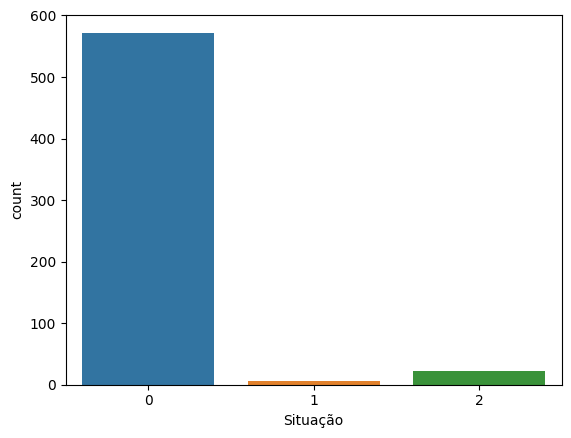

In [45]:
sns.countplot(x = cluster_map['Situação'])

In [46]:
cluster_map.groupby("Situação").describe()

PRECO                                                           \
          count        mean         std    min      25%     50%      75%   
Situação                                                                   
0         572.0   48.454073  488.306022   0.00   3.9875  10.225  23.0125   
1           6.0   31.298333   18.738659  14.45  23.7825  26.580  28.5825   
2          23.0  199.035652  814.900256   6.24  13.6800  30.250  42.0300   

                    VALOR DE MERCADO                ... DIVIDA LIQUIDA / EBIT  \
               max             count          mean  ...                   75%   
Situação                                            ...                         
0         11091.73             572.0  4.791341e+09  ...                3.6500   
1            68.08               6.0  2.921667e+11  ...                0.6825   
2          3936.42              23.0  9.868057e+10  ...                2.2150   

                 LIQ. CORRENTE                                                 \
             max         count      mean       std   min     25%   50%    75%   
Situação                                                                        
0         118.55         572.0  2.333287  4.240230  0.00  1.0225  1.63  2.370   
1           0.71           6.0  1.405000  0.422930  0.99  1.1450  1.22  1.760   
2          10.70          23.0  3.087826  5.044783  0.72  1.0350  1.94  2.075   

                 
            max  
Situação         
0         48.36  
1          1.94  
2         24.89  

[3 rows x 112 columns]

C:\Users\MessiasOliveira\AppData\Local\Temp\ipykernel_12696\3974668450.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  correlation = cluster_map.groupby("Situação").corr()


<Axes: ylabel='Situação-None'>

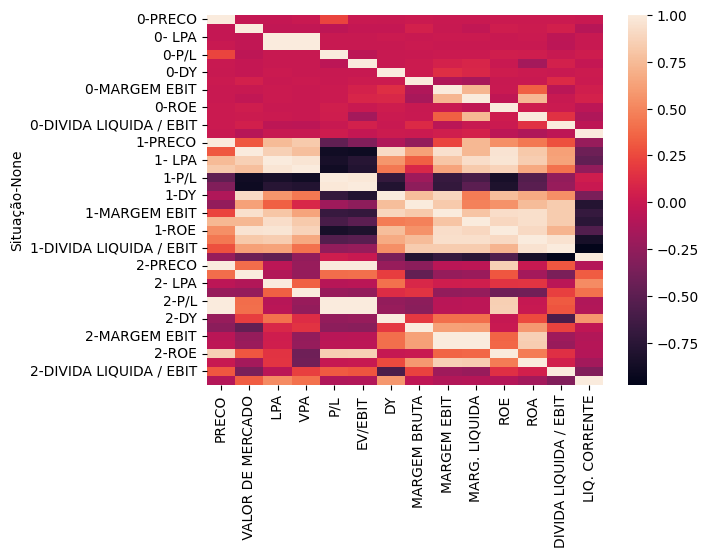

In [47]:
correlation = cluster_map.groupby("Situação").corr()
sns.heatmap(correlation, annot=False)

In [48]:
cluster_map.groupby("Situação")[" LPA"].mean()

Situação
0    80.465577
1     8.865000
2     2.433043
Name:  LPA, dtype: float64

In [55]:
cluster_map.groupby("Situação")["DY"].mean()

Situação
0     9.222640
1    23.956667
2     4.156522
Name: DY, dtype: float64

In [56]:
cluster_map.groupby("Situação")["MARG. LIQUIDA"].mean()

Situação
0    147.584965
1     22.376667
2    121.121304
Name: MARG. LIQUIDA, dtype: float64

In [49]:
# Definir o dicionário de mapeamento
mapeamento = {0:'ruim', 1:'medio', 2:'bom'}

# Aplicar o mapeamento na coluna do dataframe
cluster_map['Situação'] = cluster_map['Situação'].map(mapeamento)

In [50]:
cluster_map

,PRECO,VALOR DE MERCADO,LPA,VPA,P/L,EV/EBIT,DY,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,ROE,ROA,DIVIDA LIQUIDA / EBIT,LIQ. CORRENTE,Situação,TICKER
0,22.80,2.697076e+09,-2.09,7.67,-10.90,-209.03,1.62,30.83,-1.55,-22.50,-27.28,-9.62,-50.55,0.63,ruim,AALR3
1,16.38,3.703356e+09,3.61,23.46,4.53,3.28,6.62,32.56,26.15,18.94,15.40,1.53,-28.66,1.39,ruim,ABCB4
2,14.45,2.276429e+11,0.94,5.40,15.44,11.91,5.28,49.71,22.46,18.03,17.35,10.88,-0.48,0.99,bom,ABEV3
3,1.56,2.543977e+07,-0.38,-1.21,-4.09,-5.69,1.62,100.00,-13548.48,-18860.61,-31.47,-2571.90,0.00,0.00,ruim,ADHM3
4,1.56,1.195293e+09,-0.15,1.13,-10.29,8.56,1.62,13.11,9.22,-4.20,-13.47,-3.53,3.87,1.93,ruim,AERI3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,5.71,9.130706e+08,0.71,2.45,8.08,2.83,7.80,57.99,36.42,11.37,28.86,4.92,0.31,1.09,ruim,WIZC3
597,19.60,7.653205e+08,3.22,17.09,6.08,5.17,5.83,13.34,7.75,5.94,18.85,14.45,0.17,3.41,ruim,WLMM3
598,22.20,7.653205e+08,3.22,17.09,6.89,5.17,5.66,13.34,7.75,5.94,18.85,14.45,0.17,3.41,ruim,WLMM4
599,12.44,3.845065e+09,0.05,10.03,264.48,11.36,1.62,57.39,15.09,0.31,0.47,0.15,5.93,1.74,ruim,YDUQ3
